In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("16-diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df["Pregnancies"].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [6]:
df["Glucose"].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [7]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df["Insulin"].value_counts()

Insulin
0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: count, Length: 186, dtype: int64

In [11]:
df["Insulin"].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [12]:
df["BloodPressure"].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
columns_to_check = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
for col in columns_to_check:
    zero_count = (df[col]==0).sum()
    zero_percentage = 100* zero_count / len(df)
    print(f"{col}:{zero_count} % {zero_percentage:.2f}")
    

Glucose:5 % 0.65
BloodPressure:35 % 4.56
SkinThickness:227 % 29.56
Insulin:374 % 48.70
BMI:11 % 1.43


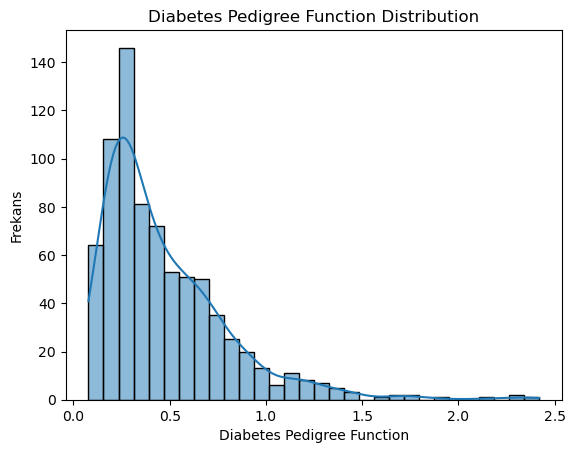

In [15]:
sns.histplot(df["DiabetesPedigreeFunction"],bins=30,kde=True)
plt.title("Diabetes Pedigree Function Distribution")
plt.xlabel("Diabetes Pedigree Function")
plt.ylabel("Frekans")
plt.show()

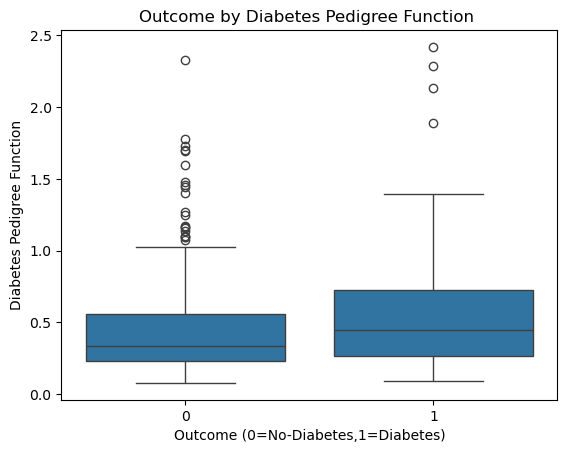

In [16]:
sns.boxplot(x="Outcome",y="DiabetesPedigreeFunction",data=df)
plt.title("Outcome by Diabetes Pedigree Function ")
plt.xlabel("Outcome (0=No-Diabetes,1=Diabetes)")
plt.ylabel("Diabetes Pedigree Function")
plt.show()

In [17]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"]

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [19]:
columns_to_fill = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]

In [20]:
medians = {}

for col in columns_to_fill:
    median_value = X_train[X_train[col]!=0][col].median()
    medians[col] = median_value
    X_train[col] = X_train[col].replace(0,median_value)

for col in columns_to_fill:
    X_test[col] = X_test[col].replace(0,medians[col])

In [21]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.907166,121.560261,72.612378,29.040717,142.477199,32.448208,0.469948,33.285016
std,3.385438,29.974412,12.165642,8.312217,80.879330,6.862948,0.328516,11.678337
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.084000,21.000000
25%,1.000000,100.000000,64.000000,25.000000,125.000000,27.600000,0.238250,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.370500,29.000000
75%,6.000000,139.750000,80.000000,32.000000,130.000000,36.500000,0.630750,40.000000
max,17.000000,199.000000,122.000000,63.000000,680.000000,67.100000,2.420000,81.000000


In [22]:
X_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.597403,122.038961,71.487013,29.376623,144.402597,32.483117,0.479565,33.064935
std,3.304818,32.320876,11.813495,10.513035,104.291511,6.946159,0.343303,12.118519
min,0.000000,61.000000,30.000000,7.000000,23.000000,18.400000,0.078000,21.000000
25%,1.000000,95.250000,64.000000,23.250000,108.250000,26.925000,0.254000,24.000000
50%,3.000000,117.000000,72.000000,29.000000,129.500000,32.300000,0.376500,28.000000
75%,5.750000,142.750000,80.000000,33.750000,129.500000,36.950000,0.603750,41.000000
max,13.000000,197.000000,106.000000,99.000000,846.000000,55.000000,2.329000,69.000000


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [25]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)

In [26]:
adaboost_result = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80       108
           1       0.55      0.63      0.59        46

    accuracy                           0.73       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.75      0.73      0.74       154

0.7337662337662337
[[84 24]
 [17 29]]


# Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
adaboost_params = {
    "n_estimators":[50,70,100,120,120,200],
    "learning_rate":[0.001,0.01,0.1,1,10]
}

In [29]:
grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=adaboost_params , cv=5, verbose=1 , n_jobs=-1)

In [30]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 100, 120, 120, 200]},
             verbose=1)

In [31]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [32]:
ada = AdaBoostClassifier(learning_rate=1,n_estimators=100)

In [33]:
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
adaboost_hyper_result = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.55      0.57      0.56        46

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.74      0.73      0.73       154

0.7337662337662337
[[87 21]
 [20 26]]


# Other Classifications 

# 1- SVC-> Support Vector Classifier

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC(kernel="linear")

In [36]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [37]:
y_pred_svc = svc.predict(X_test)
svc_result = accuracy_score(y_test,y_pred_svc)
print(classification_report(y_test,y_pred_svc))
print(accuracy_score(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.58      0.57      0.57        46

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.75      0.75      0.75       154

0.7467532467532467
[[89 19]
 [20 26]]


In [38]:
rbf = SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred_rbf = rbf.predict(X_test)
rbf_result =accuracy_score(y_test,y_pred_rbf) 
print(classification_report(y_test,y_pred_rbf))
print(accuracy_score(y_test,y_pred_rbf))
print(confusion_matrix(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.54      0.54      0.54        46

    accuracy                           0.73       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.73      0.73      0.73       154

0.7272727272727273
[[87 21]
 [21 25]]


In [39]:
poly = SVC(kernel="poly")
poly.fit(X_train,y_train)
y_pred_poly = poly.predict(X_test)
poly_result = accuracy_score(y_test,y_pred_poly)
print(classification_report(y_test,y_pred_poly))
print(accuracy_score(y_test,y_pred_poly))
print(confusion_matrix(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       108
           1       0.61      0.48      0.54        46

    accuracy                           0.75       154
   macro avg       0.70      0.67      0.68       154
weighted avg       0.74      0.75      0.74       154

0.7532467532467533
[[94 14]
 [24 22]]


In [40]:
sigmoid = SVC(kernel="sigmoid")
sigmoid.fit(X_train,y_train)
y_pred_sigmoid = sigmoid.predict(X_test)
sigmoid_result = accuracy_score(y_test,y_pred_sigmoid)
print(classification_report(y_test,y_pred_sigmoid))
print(accuracy_score(y_test,y_pred_sigmoid))
print(confusion_matrix(y_test,y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       108
           1       0.52      0.50      0.51        46

    accuracy                           0.71       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.71      0.71      0.71       154

0.7142857142857143
[[87 21]
 [23 23]]


In [41]:
# Hyperparameter Tuning for SVC

In [42]:
param_grid = {
    "C":[0.1,1,10,100],
    "kernel":["rbf"],
    "gamma":["scale","auto"]
}

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,cv=5,n_jobs=-1)

In [45]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf']})

In [46]:
grid.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}

In [47]:
grid.best_estimator_

SVC(C=1, gamma='auto')

In [48]:
y_pred_grid = grid.predict(X_test)
svc_hyper_result = accuracy_score(y_test,y_pred_grid)
print(classification_report(y_test,y_pred_grid))
print(accuracy_score(y_test,y_pred_grid))
print(confusion_matrix(y_test,y_pred_grid))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.54      0.54      0.54        46

    accuracy                           0.73       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.73      0.73      0.73       154

0.7272727272727273
[[87 21]
 [21 25]]


# 2- Naive Bayes Classifier

In [49]:
from sklearn.naive_bayes import GaussianNB

In [50]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
gnb_result = accuracy_score(y_test,y_pred_gnb)
print(classification_report(y_test,y_pred_gnb))
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       108
           1       0.53      0.57      0.55        46

    accuracy                           0.72       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.73      0.72      0.72       154

0.7207792207792207
[[85 23]
 [20 26]]


In [51]:
from sklearn.naive_bayes import BernoulliNB

In [52]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
bnb_result = accuracy_score(y_test,y_pred_bnb)
print(classification_report(y_test,y_pred_bnb))
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       108
           1       0.48      0.59      0.53        46

    accuracy                           0.69       154
   macro avg       0.64      0.66      0.65       154
weighted avg       0.71      0.69      0.70       154

0.6883116883116883
[[79 29]
 [19 27]]


# 3- KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
kn_classifier = KNeighborsClassifier(n_neighbors=5,algorithm="auto")
kn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred_kn = kn_classifier.predict(X_test)
kn_classifier_result = accuracy_score(y_test,y_pred_kn)
print(confusion_matrix(y_test,y_pred_kn))
print(accuracy_score(y_test,y_pred_kn))
print(classification_report(y_test,y_pred_kn))

[[81 27]
 [20 26]]
0.6948051948051948
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       108
           1       0.49      0.57      0.53        46

    accuracy                           0.69       154
   macro avg       0.65      0.66      0.65       154
weighted avg       0.71      0.69      0.70       154



In [56]:
kd_tree_lassifier = KNeighborsClassifier(n_neighbors=2,algorithm="kd_tree")
kd_tree_lassifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=2)

In [57]:
y_pred_kd_tree = kd_tree_lassifier.predict(X_test)
kd_tree_lassifier_result = accuracy_score(y_test,y_pred_kd_tree)
print(classification_report(y_test,y_pred_kd_tree))
print(accuracy_score(y_test,y_pred_kd_tree))
print(confusion_matrix(y_test,y_pred_kd_tree))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       108
           1       0.64      0.46      0.53        46

    accuracy                           0.76       154
   macro avg       0.71      0.67      0.69       154
weighted avg       0.75      0.76      0.75       154

0.7597402597402597
[[96 12]
 [25 21]]


In [58]:
ball_tree_classifier = KNeighborsClassifier(n_neighbors=3,algorithm="ball_tree")
ball_tree_classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)

In [59]:
y_pred_ball_tree = ball_tree_classifier.predict(X_test)
ball_tree_classifier_result = accuracy_score(y_test,y_pred_ball_tree)
print(classification_report(y_test,y_pred_ball_tree))
print(accuracy_score(y_test,y_pred_ball_tree))
print(confusion_matrix(y_test,y_pred_ball_tree))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       108
           1       0.51      0.59      0.55        46

    accuracy                           0.71       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.72      0.71      0.71       154

0.7077922077922078
[[82 26]
 [19 27]]


# 4- Decision Tree Classifier

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
decision_classifier = DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=10)
decision_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=10)

In [62]:
y_pred_decision = decision_classifier.predict(X_test)
decision_classifier_result = accuracy_score(y_test,y_pred_decision)
print(classification_report(y_test,y_pred_decision))
print(accuracy_score(y_test,y_pred_decision))
print(confusion_matrix(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       108
           1       0.54      0.59      0.56        46

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.73      0.73      0.73       154

0.7272727272727273
[[85 23]
 [19 27]]


In [63]:
#Hyperparameter tuning

In [64]:
params = {
    "criterion":["gini","entropy","log_loss"],
    "splitter":["bset","random"],
    "max_depth":[1,2,3,4,5,15,None],
    "max_features":["sqrt","log2",None]
}

In [65]:
grid_decision = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,cv=5,scoring="accuracy")

In [66]:
grid_decision.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 15, None],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['bset', 'random']},
             scoring='accuracy')

In [67]:
grid_decision.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'splitter': 'random'}

In [68]:
y_pred_grid_decision = grid_decision.predict(X_test)
grid_decision_result = accuracy_score(y_test,y_pred_grid_decision)
print(classification_report(y_test,y_pred_grid_decision))
print(accuracy_score(y_test,y_pred_grid_decision))
print(confusion_matrix(y_test,y_pred_grid_decision))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       108
           1       0.54      0.54      0.54        46

    accuracy                           0.73       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.73      0.73      0.73       154

0.7272727272727273
[[87 21]
 [21 25]]


In [69]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

[Text(0.5, 0.875, 'Glucose <= 0.198\ngini = 0.462\nsamples = 614\nvalue = [392.0, 222.0]'),
 Text(0.25, 0.625, 'Age <= -0.41\ngini = 0.32\nsamples = 390\nvalue = [312, 78]'),
 Text(0.125, 0.375, 'Pregnancies <= 1.062\ngini = 0.14\nsamples = 211\nvalue = [195, 16]'),
 Text(0.0625, 0.125, 'gini = 0.133\nsamples = 210\nvalue = [195, 15]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.375, 0.375, 'BMI <= -0.802\ngini = 0.453\nsamples = 179\nvalue = [117.0, 62.0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 144\nvalue = [82, 62]'),
 Text(0.75, 0.625, 'BMI <= -0.364\ngini = 0.459\nsamples = 224\nvalue = [80, 144]'),
 Text(0.625, 0.375, 'Glucose <= 1.1\ngini = 0.432\nsamples = 57\nvalue = [39, 18]'),
 Text(0.5625, 0.125, 'gini = 0.303\nsamples = 43\nvalue = [35, 8]'),
 Text(0.6875, 0.125, 'gini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.875, 0.375, 'Glucose <= 1.467\ngini = 0.37\nsamples =

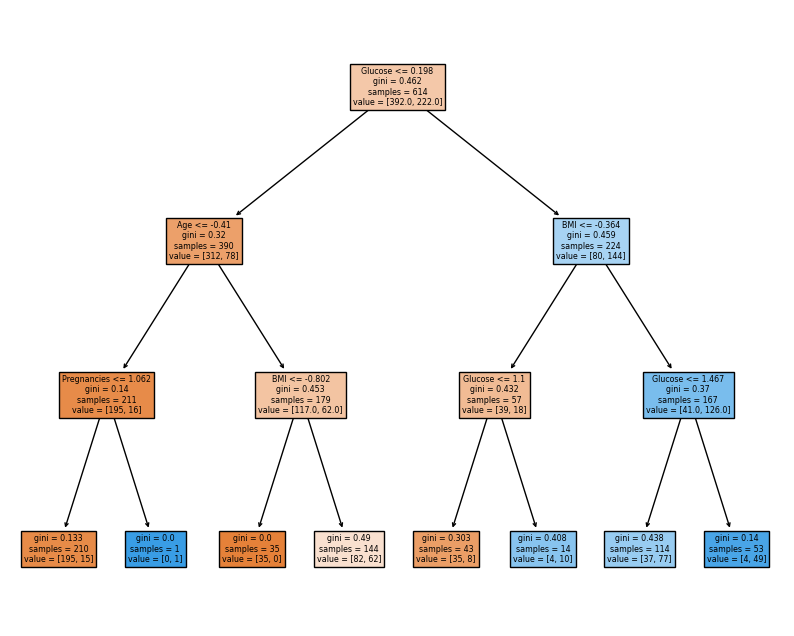

In [70]:
plt.figure(figsize=(10,8))
from sklearn import tree
tree.plot_tree(decision_classifier.fit(X_train,y_train),feature_names=df.columns,filled=True)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier(n_estimators=10,random_state=15)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=15)

In [73]:
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,y_pred_rfc))
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       108
           1       0.58      0.57      0.57        46

    accuracy                           0.75       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.75      0.75      0.75       154

0.7467532467532467
[[89 19]
 [20 26]]


In [74]:
rfc = RandomForestClassifier(n_estimators=14,random_state=15)
rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
rfc_result = accuracy_score(y_test,y_pred_rfc)
print(classification_report(y_test,y_pred_rfc))
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       108
           1       0.62      0.61      0.62        46

    accuracy                           0.77       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.77      0.77      0.77       154

0.7727272727272727
[[91 17]
 [18 28]]


In [75]:
#Hyperparameter Tuning

In [76]:
rf_params = {
    "n_estimators":[114,214,312,514],
    "max_depth":[5,8,10,15,None],
    "max_features":[5,6,7,8]
}

In [77]:
rfc_1 = RandomForestClassifier()

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
rscv = RandomizedSearchCV(estimator=rfc_1, param_distributions=rf_params, cv=3 , n_jobs=-1)
rscv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 10, 15, None],
                                        'max_features': [5, 6, 7, 8],
                                        'n_estimators': [114, 214, 312, 514]})

In [80]:
y_pred_rscv = rscv.predict(X_test)
rscv_result = accuracy_score(y_test,y_pred_rscv)
print(classification_report(y_test,y_pred_rscv))
print(accuracy_score(y_test,y_pred_rscv))
print(confusion_matrix(y_test,y_pred_rscv))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       108
           1       0.56      0.67      0.61        46

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.76      0.75      0.75       154

0.7467532467532467
[[84 24]
 [15 31]]


In [81]:
accuracy_scores = {
    "Adaboost Result": adaboost_result,
    "Adaboost Hyper Result": adaboost_hyper_result,
    "SVC Result": svc_result,
    "Rbf Result": rbf_result,
    "Poly Result": poly_result,
    "Sigmoid Result": sigmoid_result,
    "SVC Hyper Reuslt": svc_hyper_result,
    "GNB Result": gnb_result,
    "BNB Result": bnb_result,
    "KN Classifier Result": kn_classifier_result,
    "KD Tree Classifier Result": kd_tree_lassifier_result,
    "Ball Tree Classifier Result": ball_tree_classifier_result,
    "Decision Classifier Reuslt ": decision_classifier_result,
    "Grid Decision Result": grid_decision_result,
    "RFC Result": rfc_result,
    "RSCV Result": rscv_result
}

In [82]:
df_result = pd.DataFrame(list(accuracy_scores.items()),columns=["Models","Accuracy Score"])

In [83]:
print(df_result)

                         Models  Accuracy Score
0               Adaboost Result        0.733766
1         Adaboost Hyper Result        0.733766
2                    SVC Result        0.746753
3                    Rbf Result        0.727273
4                   Poly Result        0.753247
5                Sigmoid Result        0.714286
6              SVC Hyper Reuslt        0.727273
7                    GNB Result        0.720779
8                    BNB Result        0.688312
9          KN Classifier Result        0.694805
10    KD Tree Classifier Result        0.759740
11  Ball Tree Classifier Result        0.707792
12  Decision Classifier Reuslt         0.727273
13         Grid Decision Result        0.727273
14                   RFC Result        0.772727
15                  RSCV Result        0.746753
